In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import anndata as ad
import numpy as np
import pandas as pd

from rich import print
import os
import scanpy as sc

import scvi

import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
# Set SVG font type to 'none' to keep text as text in SVG files
plt.rcParams["svg.fonttype"] = "none"


from scib_metrics.benchmark import Benchmarker, BatchCorrection, BioConservation
from harmony import harmonize

scvi.settings.seed = 34

/home/nathanlevy/mambaforge/envs/scvi/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/nathanlevy/mambaforge/envs/scvi/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/nathanlevy/mambaforge/envs/scvi/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/nathanlevy/mambaforge/envs/scvi/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/home/nathanlevy/mambaforge/envs/scvi/lib/python3.11/site-packages/anndata/utils.py:429: Futur

In [3]:
# from nichevi.spatial_analysis import SpatialAnalysis
from params import setup  # , cell_type_color_dict, niche_color_dict, niche_setup

In [4]:
sc.set_figure_params(dpi=150, fontsize=12, format="svg")

figure_dir = setup.FIGURES_FOLDER

plots = True

In [7]:
data_dir, data_file = setup.DATA_FOLDER, setup.DATA_FILE

data_file_name = os.path.splitext(data_file)[0]
print(data_file_name)


path_to_save = os.path.join("../../niche-VI-experiments/checkpoints", data_file_name)
os.makedirs(path_to_save, exist_ok=True)

adata_M1_M2_core_6_sections

In [8]:
# adata = ad.read_h5ad(data_dir + data_file)
adata = ad.read_h5ad(path_to_save + "/adata_M1_M2_core_6_sections_nicheVI.h5ad")

print(adata)

AnnData object with n_obs × n_vars = 250790 × 1122
    obs: 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 
'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 
'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'cluster_id_transfer', 
'subclass_transfer', 'cluster_confidence_score', 'subclass_confidence_score', 'high_quality_transfer', 
'major_brain_region', 'ccf_region_name', 'brain_section_label', 'tissue_type', 'is_primary_data', 'cell_type', 
'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 
'observation_joinid', 'n_counts', 'batch', '_scvi_batch', '_scvi_labels', 'n_genes_by_counts', 
'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 
'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 
'log1p_total_counts_mt', 'pct_counts_mt', '_indices', '_scvi_ind_x', 'major_brain_region_banksy_astrocyte', 
'major_brain_region_banksy_endothelial', 'major_brain_region_banksy_oligodendrocyte_precursor', 
'major_brain_region_banksy_microglial', 'major_brain_region_banksy_pericyte', 
'major_brain_region_banksy_oligodendrocyte', 'major_brain_region_banksy_glutamatergic', 
'major_brain_region_banksy_GABAergic', 'cell_type_niche', 'index', '_scvi_sample'
    var: 'gene_name', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 
'feature_length', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 
'total_counts', 'log1p_total_counts'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'pca', 'simvi_train_mask', 'simvi_train_mask_06', 
'simvi_train_mask_08', 'simvi_val_mask', 'simvi_val_mask_06', 'simvi_val_mask_08'
    obsm: 'X_CCF', 'X_banksy_02_harmony_GABAergic', 'X_banksy_02_harmony_astrocyte', 
'X_banksy_02_harmony_endothelial', 'X_banksy_02_harmony_glutamatergic', 'X_banksy_02_harmony_microglial', 
'X_banksy_02_harmony_oligodendrocyte', 'X_banksy_02_harmony_oligodendrocyte_precursor', 
'X_banksy_02_harmony_pericyte', 'X_nicheformer', 'X_nicheformer_e1', 'X_nicheformer_e5', 'X_pca', 'X_resolvi', 
'X_resolvi_MDE', 'X_scanvi', 'X_spatial', 'X_umap', 'banksy_pc_20_lambda_0.0', 'banksy_pc_20_lambda_0.0_GABAergic',
'banksy_pc_20_lambda_0.0_astrocyte', 'banksy_pc_20_lambda_0.0_endothelial', 
'banksy_pc_20_lambda_0.0_glutamatergic', 'banksy_pc_20_lambda_0.0_microglial', 
'banksy_pc_20_lambda_0.0_oligodendrocyte', 'banksy_pc_20_lambda_0.0_oligodendrocyte_precursor', 
'banksy_pc_20_lambda_0.0_pericyte', 'banksy_pc_20_lambda_0.2', 'banksy_pc_20_lambda_0.2_GABAergic', 
'banksy_pc_20_lambda_0.2_astrocyte', 'banksy_pc_20_lambda_0.2_endothelial', 
'banksy_pc_20_lambda_0.2_glutamatergic', 'banksy_pc_20_lambda_0.2_microglial', 
'banksy_pc_20_lambda_0.2_oligodendrocyte', 'banksy_pc_20_lambda_0.2_oligodendrocyte_precursor', 
'banksy_pc_20_lambda_0.2_pericyte', 'banksy_pc_20_lambda_0.4', 'banksy_pc_20_lambda_0.4_astrocyte', 
'banksy_pc_20_lambda_0.5', 'banksy_pc_20_lambda_0.6', 'distance_neighbor', 'index_neighbor', 
'neighborhood_composition', 'niche_distances', 'niche_indexes', 'qz1_m', 'qz1_m_niche_ct', 
's10_scanvi_lr0.0005_poisson_X_nicheVI', 'simvi_both', 'simvi_both_06', 'simvi_both_07', 'simvi_both_08', 
'simvi_both_MDE', 'simvi_both_MDE_06', 'simvi_both_MDE_07', 'simvi_both_MDE_08', 'simvi_interact', 
'simvi_interact_06', 'simvi_interact_07', 'simvi_interact_08', 'simvi_interact_MDE', 'simvi_interact_MDE_06', 
'simvi_interact_MDE_07', 'simvi_interact_MDE_08', 'simvi_intrinsic', 'simvi_intrinsic_06', 'simvi_intrinsic_07', 
'simvi_intrinsic_08', 'simvi_intrinsic_MDE', 'simvi_intrinsic_MDE_06', 'simvi_intrinsic_MDE_07', 
'simvi_intrinsic_MDE_08', 'spatial'
    varm: 'PCs'
    layers: 'counts'

In [8]:
adata.obs["counts_per_cell"] = adata.layers["counts"].sum(axis=1)
adata.obs["counts_per_cell"].min()

4.0

In [8]:
adata.obs[setup.NICHE].value_counts()

major_brain_region
Isocortex              78614
Thalamus               39094
Striatum               29183
Fiber_tracts           27785
Hypothalamus           25603
Olfactory              13979
Hippocampus            13786
Cortical_subplate       9045
Ventricular_systems     7533
Pallidum                6168
Name: count, dtype: int64

In [10]:
adata.obs["cell_type_niche"] = (
    adata.obs[setup.CELL_TYPE].astype(str) + "_" + adata.obs[setup.NICHE].astype(str)
)

adata.obsm["X_banksy_02_harmony"] = harmonize(
    adata.obsm["banksy_pc_20_lambda_0.2"], adata.obs, batch_key=setup.BATCH
)

TRESHOLD = 400

value_counts = adata.obs["cell_type_niche"].value_counts()
cell_types_to_keep = value_counts[value_counts >= TRESHOLD].index
adata_subset = adata[adata.obs["cell_type_niche"].isin(cell_types_to_keep)].copy()

cell_types = adata_subset.obs[setup.CELL_TYPE].unique()

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
	Completed 8 / 10 iteration(s).
	Completed 9 / 10 iteration(s).
	Completed 10 / 10 iteration(s).
Reach convergence after 10 iteration(s).


In [11]:
adata_subset.obs[setup.CELL_TYPE].value_counts()

cell_type
glutamatergic neuron              89523
oligodendrocyte                   40406
GABAergic neuron                  35772
astrocyte                         29856
endothelial cell                  22870
microglial cell                    8306
oligodendrocyte_precursor cell     6200
pericyte                           4400
ependymal cell                     1688
choroid plexus epithelial cell     1427
vascular leptomeningeal cell        985
neuroblast (sensu Vertebrata)       465
smooth muscle cell                  460
tanycyte                            402
Name: count, dtype: int64

In [12]:
adata.obs[setup.NICHE][adata.obs[setup.CELL_TYPE] == "astrocyte"].value_counts()

major_brain_region
Isocortex              7015
Thalamus               5117
Hypothalamus           3896
Fiber_tracts           3715
Striatum               3459
Hippocampus            2251
Olfactory              1787
Cortical_subplate      1092
Pallidum                978
Ventricular_systems     546
Name: count, dtype: int64

# REGION CLASSIFIER

In [13]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score

# # Initialize an empty list to store the results
# results = []

# # Iterate over each unique cell type
# for cell_type in cell_types:
#     # Filter the data for the current cell type
#     mask = adata_subset.obs[setup.CELL_TYPE] == cell_type
#     X = adata_subset.X[mask]
#     y = adata_subset.obs.loc[mask, setup.NICHE]

#     type_niche_list = adata_subset.obs[mask]["cell_type_niche"].unique().tolist()
#     if len(type_niche_list) == 1:
#         print(f"Skipping {cell_type} as it only has one niche")
#         continue

#     # Split the data into training and test sets
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42, stratify=y
#     )

#     # Initialize the classifier (Random Forest in this example)
#     classifier = RandomForestClassifier(random_state=42)

#     # Fit the classifier to the training data
#     classifier.fit(X_train, y_train)

#     # Predict on the test set
#     y_pred = classifier.predict(X_test)

#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred)

#     # Calculate F1 scores
#     f1_weighted = f1_score(y_test, y_pred, average="weighted")  # Weighted F1 score
#     f1_macro = f1_score(y_test, y_pred, average="macro")  # Macro F1 score
#     f1_micro = f1_score(y_test, y_pred, average="micro")  # Micro F1 score

#     # Append the results to the list
#     results.append(
#         {
#             "Cell Type": cell_type,
#             "Accuracy": accuracy,
#             "F1 Score (Weighted)": f1_weighted,
#             "F1 Score (Macro)": f1_macro,
#             "F1 Score (Micro)": f1_micro,
#         }
#     )

# # Convert the results list to a DataFrame
# results_df = pd.DataFrame(results)

# # Display the DataFrame
# results_df.set_index("Cell Type", inplace=True)
# results_df.to_csv(path_to_save + "/region_classification.csv")

In [14]:
# results_df = pd.read_csv(path_to_save + "/region_classification.csv", index_col=0)
# results_df

In [15]:
# sample = adata.obs[setup.SAMPLE].unique().tolist()[1:2]

# adata_sample = adata_subset[adata_subset.obs[setup.SAMPLE].isin(sample)].copy()
# for type in adata_subset.obs[setup.CELL_TYPE].unique().tolist()[:]:
#     sc.pl.spatial(
#         adata_sample[(adata_sample.obs[setup.CELL_TYPE] == type)],
#         spot_size=40,
#         color=["cell_type_niche"],
#         ncols=1,
#         frameon=False,
#         title=sample,
#         palette="tab20",
#         show=False,
#     )

# SCIB COMPUTE

In [16]:
# for type in adata_subset.obs[setup.CELL_TYPE].unique().tolist():
#     adata_subset_type = adata_subset[adata_subset.obs[setup.CELL_TYPE] == type].copy()

#     markers_list_niche = []

#     type_niche_list = adata_subset_type.obs["cell_type_niche"].unique().tolist()
#     if len(type_niche_list) == 1:
#         print(f"Skipping {type} as it only has one niche")
#         continue

#     print(type)

#     for type_niche in type_niche_list:
#         sc.tl.rank_genes_groups(
#             adata_subset_type,
#             groupby="cell_type_niche",
#             method="wilcoxon",
#             groups=[type_niche],
#             reference="rest",
#             key_added=f"rank_genes_groups_ttest_{type_niche}",
#             # pts=True,
#             use_raw=False,
#         )

#         markers_dict_niche = sc.get.rank_genes_groups_df(
#             adata_subset_type,
#             key=f"rank_genes_groups_ttest_{type_niche}",
#             group=type_niche,
#             pval_cutoff=0.05,
#             log2fc_min=LFC_NICHE_MARKERS,
#         )["names"].tolist()

#         markers_list_niche.append(len(markers_dict_niche))

#         # print(type_niche, len(markers_dict_niche))

#     # print(sum(markers_list_niche)  / (len(markers_list_niche) * len(markers_dict[type])))
#     prop_of_marker_genes_type = sum(markers_list_niche) / (
#         len(markers_list_niche) * len(markers_dict[type])
#     )

#     dict_DE["cell_type"].append(type)
#     dict_DE[f"# marker genes_lfc_{LFC_TYPE_MARKERS}"].append(len(markers_dict[type]))
#     dict_DE[f"Avg prop of DE marker genes_lfc_{LFC_NICHE_MARKERS}"].append(
#         prop_of_marker_genes_type
#     )

In [9]:
batchcorr = BatchCorrection(
    silhouette_batch=True,
    ilisi_knn=True,
    kbet_per_label=True,
    graph_connectivity=True,
    pcr_comparison=False,
)

biocons = BioConservation(
    isolated_labels=True,
    nmi_ari_cluster_labels_leiden=True,
    nmi_ari_cluster_labels_kmeans=False,
    silhouette_label=True,
    clisi_knn=True,
)

# biocons = BioConservation(
#     isolated_labels=False,
#     nmi_ari_cluster_labels_leiden=True,
#     nmi_ari_cluster_labels_kmeans=False,
#     silhouette_label=False,
#     clisi_knn=False,
# )

# banksy_key_1 = "banksy_pc_20_lambda_0.2"
# banksy_key_2 = "banksy_pc_20_lambda_0.4"


KEY_1 = "X_scanvi"
# KEY_1 = "qz1_m"
# MODEL = "mog_s20_w400_scanvi_lr0.0005_poisson"
MODEL = "s10_scanvi_lr0.0005_poisson"


SAVE_CSV = True

embedding_obsm_keys = [
    KEY_1,
    MODEL + "_X_nicheVI",
    "simvi_both_08",
    # banksy_key_1,
    # banksy_key_2,
    "X_banksy_02_harmony",
    "X_nicheformer",
]

In [ ]:
if SAVE_CSV:
    # Define the save path as a string and create the directory if it doesn't exist
    path_to_save_scib = "cell_type_scib"
    os.makedirs(path_to_save_scib, exist_ok=True)

print(embedding_obsm_keys)

['X_scanvi', 's10_scanvi_lr0.0005_poisson_X_nicheVI', 'simvi_both_08', 'X_banksy_02_harmony', 'X_nicheformer']

In [18]:
# Initialize dictionaries
dict_DE = {"cell_type": []}
dict_BC = {"cell_type": []}
dict_NMI = {"cell_type": []}
dict_ARI = {"cell_type": []}
dict_cLISI = {"cell_type": []}
# dict_KMeans_NMI = {"cell_type": []}
# dict_KMeans_ARI = {"cell_type": []}

# Add embedding keys to each dictionary
for embedding in embedding_obsm_keys:
    dict_BC[embedding] = []
    dict_DE[embedding] = []
    dict_NMI[embedding] = []
    dict_ARI[embedding] = []
    dict_cLISI[embedding] = []
    # dict_KMeans_NMI[embedding] = []
    # dict_KMeans_ARI[embedding] = []

# Loop through each cell type
for cell_type in adata_subset.obs[setup.CELL_TYPE].unique().tolist():
    adata_subset_type = adata_subset[
        adata_subset.obs[setup.CELL_TYPE] == cell_type
    ].copy()
    type_niche_list = adata_subset_type.obs["cell_type_niche"].unique().tolist()

    # Skip cell types with only one niche
    if len(type_niche_list) == 1:
        print(f"Skipping {cell_type} as it only has one niche")
        continue

    print(cell_type)

    # Append cell type to dictionaries
    for d in [
        dict_DE,
        dict_BC,
        dict_NMI,
        dict_ARI,
        dict_cLISI,
        # dict_KMeans_NMI,
        # dict_KMeans_ARI,
    ]:
        d["cell_type"].append(cell_type)

    # Create and run the benchmarker
    bm = Benchmarker(
        adata_subset_type,
        batch_key=setup.BATCH,
        label_key="cell_type_niche",
        embedding_obsm_keys=embedding_obsm_keys,
        bio_conservation_metrics=biocons,
        batch_correction_metrics=batchcorr,
        n_jobs=-1,
    )
    bm.benchmark()

    # Get the results table
    scib_type = bm.get_results(min_max_scale=False)
    biocons_scores = scib_type["Bio conservation"]
    batchcorr_scores = scib_type["Batch correction"]

    # Append scores for each embedding
    for embedding in embedding_obsm_keys:
        dict_DE[embedding].append(biocons_scores[embedding])
        dict_BC[embedding].append(batchcorr_scores[embedding])
        dict_NMI[embedding].append(scib_type["Leiden NMI"][embedding])
        dict_ARI[embedding].append(scib_type["Leiden ARI"][embedding])
        dict_cLISI[embedding].append(scib_type["cLISI"][embedding])
        # dict_KMeans_NMI[embedding].append(scib_type["KMeans NMI"][embedding])
        # dict_KMeans_ARI[embedding].append(scib_type["KMeans ARI"][embedding])

# Convert dictionaries to DataFrames and save as CSV files
df_DE = pd.DataFrame(dict_DE).set_index("cell_type")
df_BC = pd.DataFrame(dict_BC).set_index("cell_type")

if SAVE_CSV:
    df_DE.to_csv(os.path.join(path_to_save_scib, "BioCons.csv"))
    df_BC.to_csv(os.path.join(path_to_save_scib, "BatchCorr.csv"))

oligodendrocyte

Embeddings:   0%|          | 0/5 [00:00<?, ?it/s]

Running metrics for embedding: X_scanvi


2025-01-12 08:41:35.990495: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version (12.6.68). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


Optimal resolution: 0.6


Resolution: 0.6, n_clusters: 13, nmi: 0.19632252746755183, ari: 0.14164068645151395


/mnt/sda/nathan/scib-metrics/src/scib_metrics/metrics/_graph_connectivity.py:30: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)
Embeddings:  20%|██        | 1/5 [06:55<27:42, 415.52s/it]

Running metrics for embedding: s10_scanvi_lr0.0005_poisson_X_nicheVI


Optimal resolution: 0.6


Resolution: 0.6, n_clusters: 13, nmi: 0.3381949394113072, ari: 0.29495017378547983


/mnt/sda/nathan/scib-metrics/src/scib_metrics/metrics/_graph_connectivity.py:30: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)
Embeddings:  40%|████      | 2/5 [13:37<20:23, 407.77s/it]

Running metrics for embedding: simvi_both_08


Optimal resolution: 1.4


Resolution: 1.4, n_clusters: 23, nmi: 0.20132892653120293, ari: 0.11397755609250161


/mnt/sda/nathan/scib-metrics/src/scib_metrics/metrics/_graph_connectivity.py:30: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)
Embeddings:  60%|██████    | 3/5 [20:56<14:03, 421.75s/it]

Running metrics for embedding: X_banksy_02_harmony


Optimal resolution: 0.2


Resolution: 0.2, n_clusters: 7, nmi: 0.4226207568263033, ari: 0.3717259635419024


/mnt/sda/nathan/scib-metrics/src/scib_metrics/metrics/_graph_connectivity.py:30: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)
Embeddings:  80%|████████  | 4/5 [27:28<06:50, 410.22s/it]

Running metrics for embedding: X_nicheformer


Optimal resolution: 1.8


Resolution: 1.8, n_clusters: 43, nmi: 0.014937315511792506, ari: 2.0446083780526764e-05


## read

In [ ]:
if SAVE_CSV:
    df_DE = pd.read_csv(path_to_save_scib + "/BioCons.csv", index_col=0)
    df_BC = pd.read_csv(path_to_save_scib + "/BatchCorr.csv", index_col=0)
df_DE = df_DE.rename(
    columns={
        "X_scanvi": "SCANVI",
        MODEL + "_X_nicheVI": "NICHEVI",
        "simvi_both_08": "SIMVI",
        "X_banksy_02_harmony": "BANKSY",
        "X_nicheformer": "NICHEFORMER"
    }
)
df_DE = df_DE.reindex(columns=["SCANVI", "SIMVI", "BANKSY",  "NICHEFORMER", "NICHEVI"])
df_DE

,SCANVI,SIMVI,BANKSY,NICHEFORMER,NICHEVI
cell_type,,,,,
oligodendrocyte,0.431496,0.429427,0.551489,0.350231,0.513525
endothelial cell,0.398679,0.412994,0.579613,0.332275,0.521760
astrocyte,0.517690,0.520885,0.600964,0.330760,0.595941
GABAergic neuron,0.584331,0.597526,0.648942,0.394622,0.613471
microglial cell,0.395254,0.419266,0.569897,0.316776,0.504648
oligodendrocyte_precursor cell,0.420384,0.441361,0.573907,0.292081,0.562516
pericyte,0.368135,0.409258,0.652499,0.298128,0.588197
glutamatergic neuron,0.596147,0.655204,0.646975,0.420599,0.630747


In [ ]:
df_BC = df_BC.rename(
    columns={
        "X_scanvi": "SCANVI",
        MODEL + "_X_nicheVI": "NICHEVI",
        "simvi_both_08": "SIMVI",
        "X_banksy_02_harmony": "BANKSY",
        "X_nicheformer": "NICHEFORMER",
    }
)
df_BC = df_BC.reindex(columns=["SCANVI", "SIMVI", "BANKSY", "NICHEFORMER" , "NICHEVI"])
df_BC

,SCANVI,SIMVI,BANKSY,NICHEFORMER,NICHEVI
cell_type,,,,,
oligodendrocyte,0.587171,0.624737,0.645608,0.450277,0.668002
endothelial cell,0.636204,0.667426,0.704102,0.516374,0.712020
astrocyte,0.703253,0.706673,0.713606,0.520184,0.717987
GABAergic neuron,0.634329,0.650964,0.658454,0.543334,0.685410
microglial cell,0.709195,0.722742,0.741014,0.542683,0.775226
oligodendrocyte_precursor cell,0.766950,0.755130,0.769223,0.561283,0.804889
pericyte,0.772324,0.770477,0.782201,0.602516,0.805104
glutamatergic neuron,0.639792,0.644752,0.667249,0.570617,0.639669


In [13]:
df_total = 0.6 * df_DE + 0.4 * df_BC
df_total

,SCANVI,SIMVI,BANKSY,NICHEFORMER,NICHEVI
cell_type,,,,,
oligodendrocyte,0.493766,0.507551,0.589137,0.390250,0.575316
endothelial cell,0.493689,0.514767,0.629409,0.405914,0.597864
astrocyte,0.591915,0.595200,0.646021,0.406530,0.644759
GABAergic neuron,0.604330,0.618901,0.652747,0.454107,0.642247
microglial cell,0.520830,0.540656,0.638343,0.407139,0.612880
oligodendrocyte_precursor cell,0.559011,0.566868,0.652033,0.399762,0.659465
pericyte,0.529811,0.553745,0.704380,0.419883,0.674960
glutamatergic neuron,0.613605,0.651024,0.655085,0.480606,0.634316


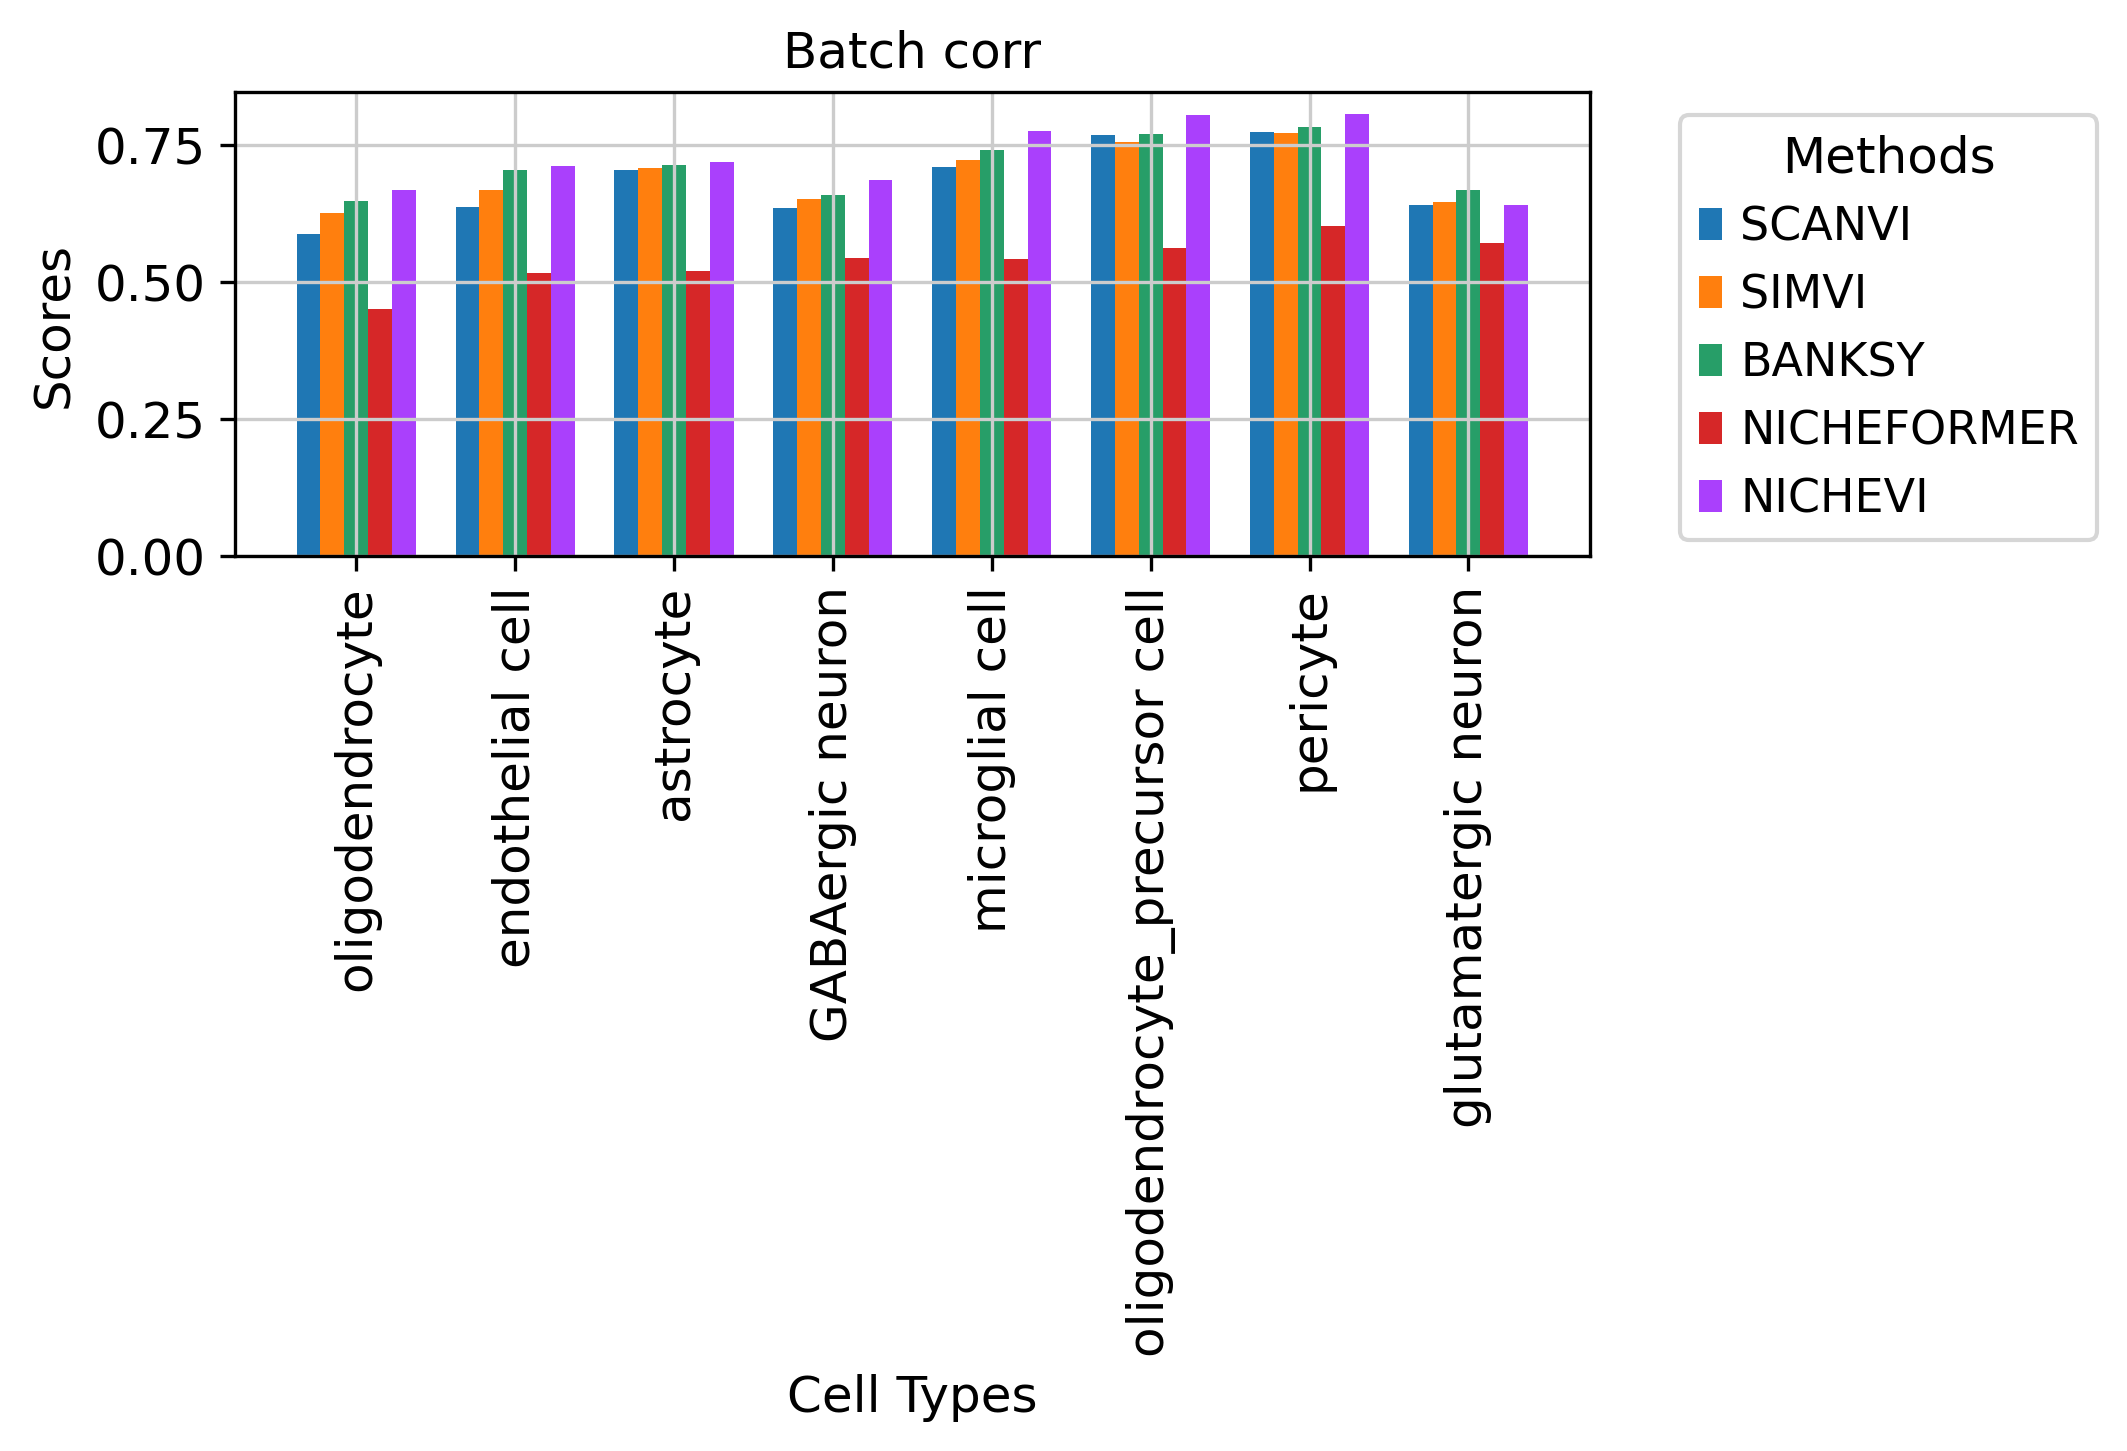

In [21]:
df = df_BC

# Plot settings
fig, ax = plt.subplots(
    figsize=(len(df) * 0.9, 5)  # Width based on number of cell types
)

# Define x locations for each cell type
x = np.arange(len(df.index))

# Set bar width
bar_width = 0.15

# Plot each method score as a separate bar within each cell type
for i, method in enumerate(df.columns):
    ax.bar(x + i * bar_width, df[method], width=bar_width, label=method)

# Add x-ticks and labels
ax.set_xticks(x + bar_width * (len(df.columns) - 1) / 2)
ax.set_xticklabels(df.index, rotation=90)

# Set legend and labels
ax.legend(title="Methods", bbox_to_anchor=(1.05, 1), loc="upper left")
ax.set_ylabel("Scores")
ax.set_xlabel("Cell Types")

# Show plot
plt.title('Bio cons')   
plt.title('SCIB score')
plt.title('Batch corr')
plt.tight_layout()
plt.savefig(f"{setup.FIGURES_FOLDER}/cell_type_scib_batch.png", dpi=1000)
plt.savefig(f"{setup.FIGURES_FOLDER}/cell_type_scib_batch.svg", dpi=1000)
plt.show()

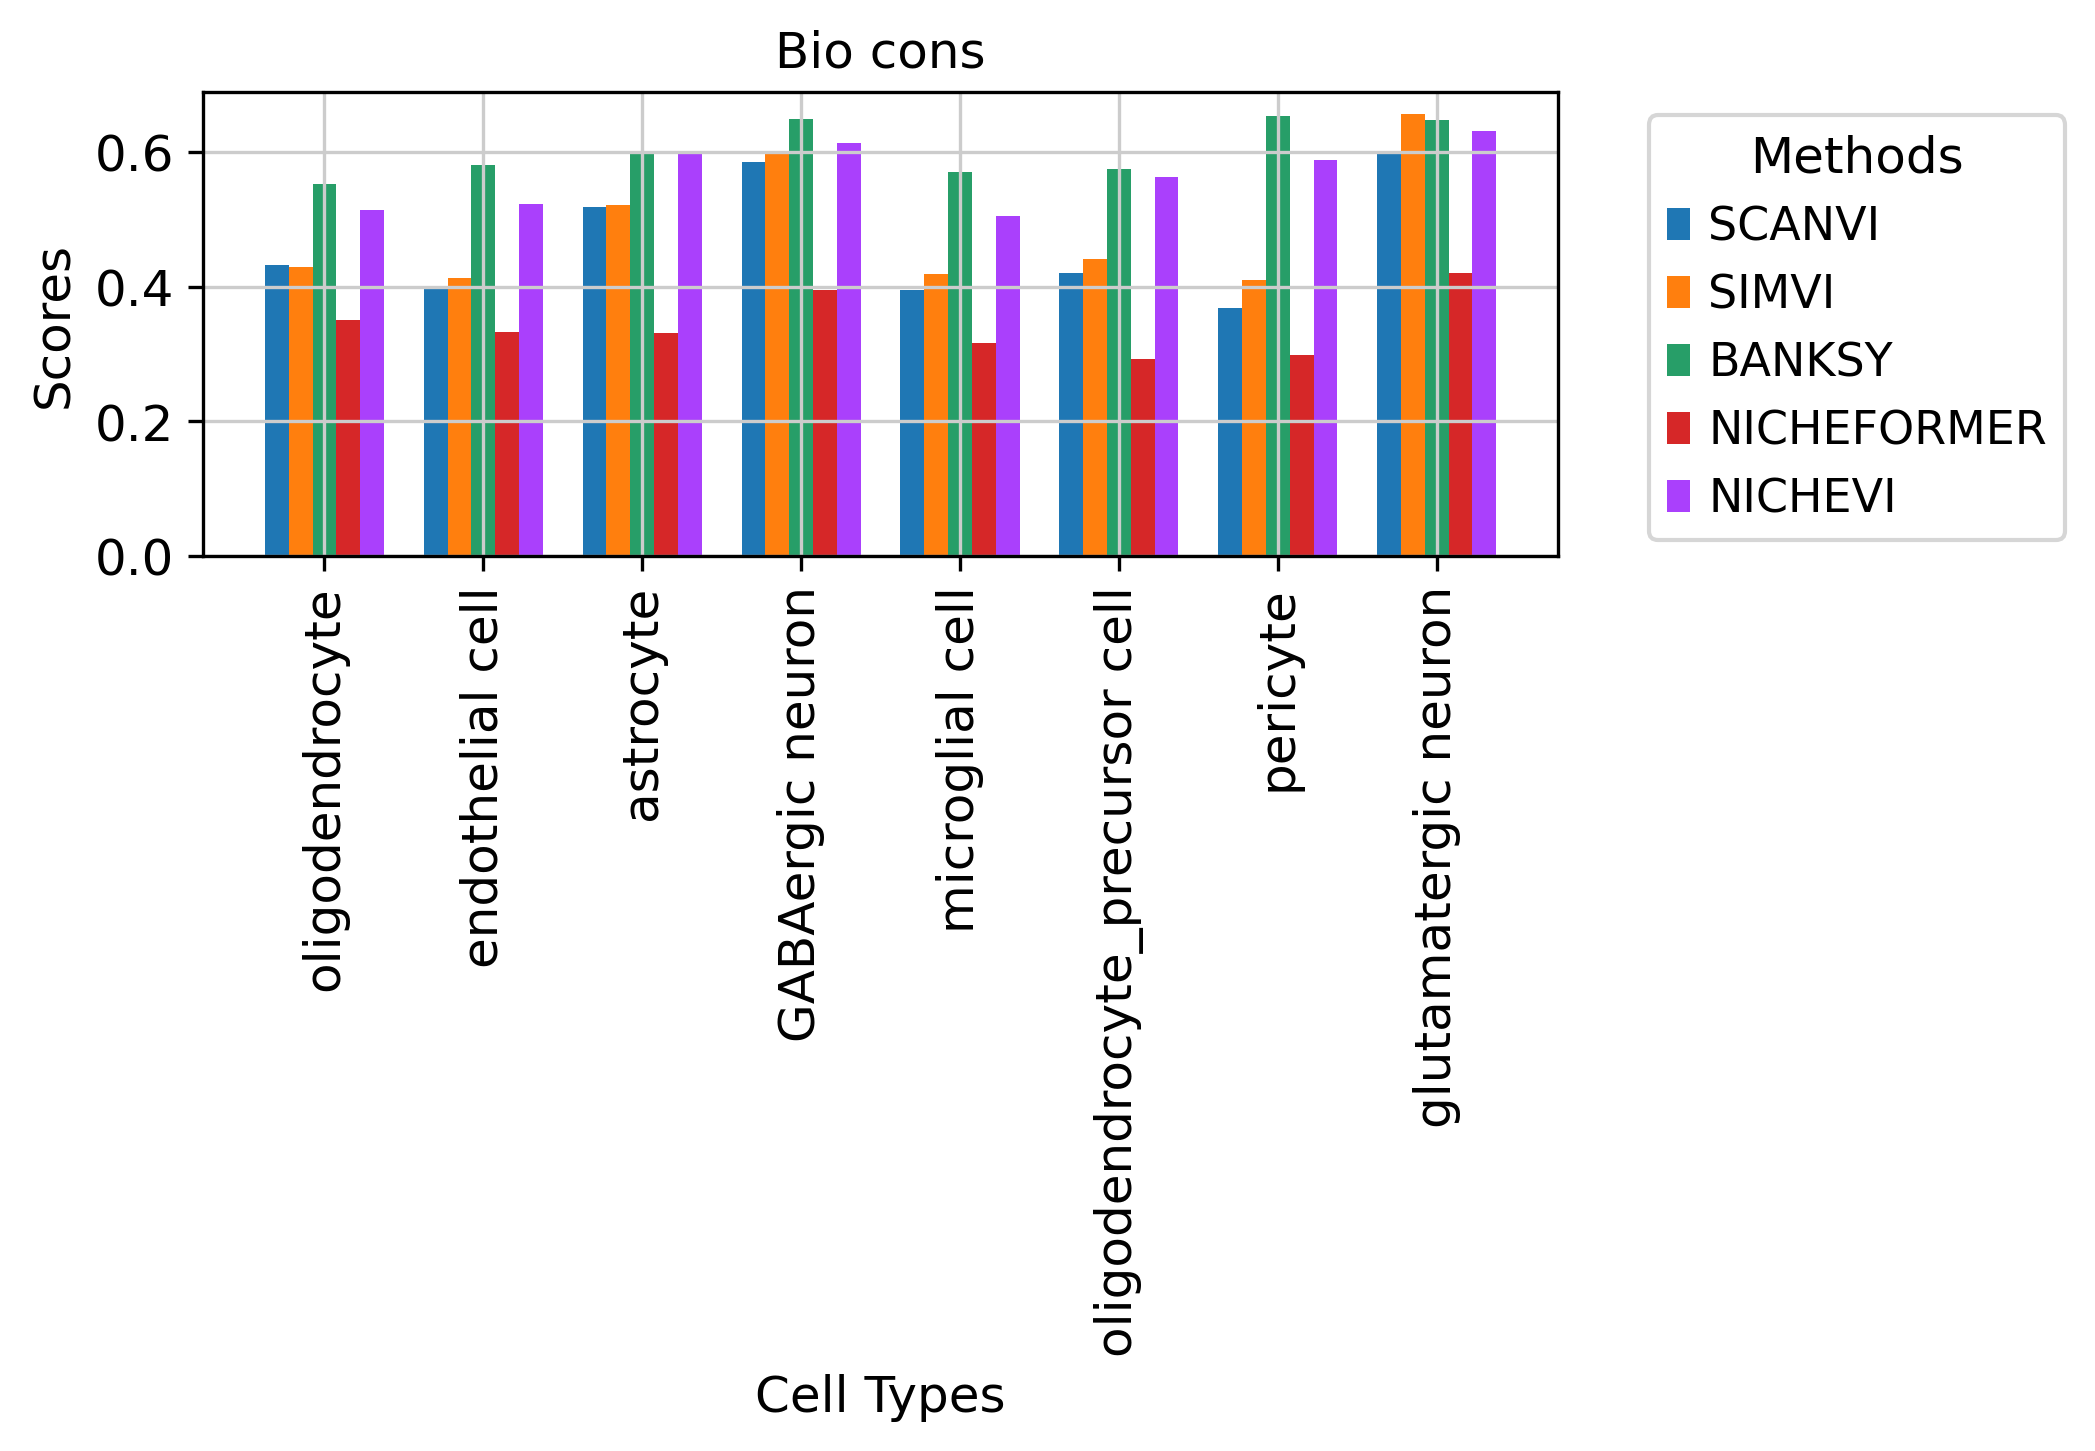

In [15]:
df = df_DE

# Plot settings
fig, ax = plt.subplots(
    figsize=(len(df) * 0.9, 5)  # Width based on number of cell types
)

# Define x locations for each cell type
x = np.arange(len(df.index))

# Set bar width
bar_width = 0.15

# Plot each method score as a separate bar within each cell type
for i, method in enumerate(df.columns):
    ax.bar(x + i * bar_width, df[method], width=bar_width, label=method)

# Add x-ticks and labels
ax.set_xticks(x + bar_width * (len(df.columns) - 1) / 2)
ax.set_xticklabels(df.index, rotation=90)

# Set legend and labels
ax.legend(title="Methods", bbox_to_anchor=(1.05, 1), loc="upper left")
ax.set_ylabel("Scores")
ax.set_xlabel("Cell Types")

# Show plot
plt.title('Bio cons')   
# plt.title('SCIB score')
# plt.title('Batch corr')
plt.tight_layout()
# plt.savefig(f"{setup.FIGURES_FOLDER}/cell_type_scib_batch.png", dpi=1000)
# plt.savefig(f"{setup.FIGURES_FOLDER}/cell_type_scib_batch.svg", dpi=1000)
plt.show()